In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart failure.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

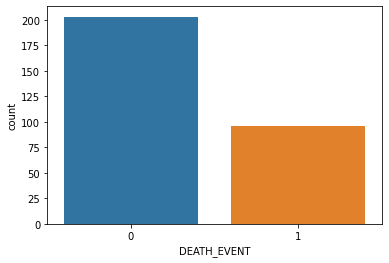

In [3]:
sns.countplot(x='DEATH_EVENT', data=df)

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

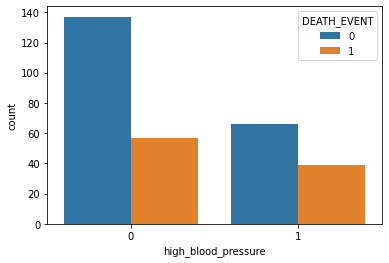

In [4]:
sns.countplot(x='high_blood_pressure',hue='DEATH_EVENT', data=df)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

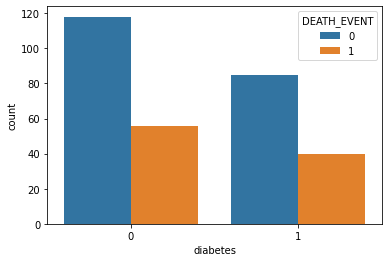

In [5]:
sns.countplot(x='diabetes',hue='DEATH_EVENT', data=df)

# Train-Test-Split

In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df.drop('DEATH_EVENT',axis=1),df[['DEATH_EVENT']],train_size=.70)

In [7]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [8]:
pred = dt.predict(xtrain)
ytrain['pred']=pred
ytrain.head(10)

,DEATH_EVENT,pred
193,0,0
153,0,0
156,0,0
36,1,1
243,0,0
291,0,0
22,1,1
223,0,0
172,0,0
64,0,0


In [9]:
dt.score(xtrain,ytrain)   # as 2 column now

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

In [10]:
ytrain = ytrain.drop('pred',axis=1)

In [11]:
dt.score(xtrain,ytrain)  #dt.score(xtrain,ytrain['DEATH_EVENT'])

1.0

In [13]:
pred2= dt.predict(xtest)
dt.score(xtest,ytest)

0.8333333333333334

# Confusion Matrix

In [14]:
from sklearn.metrics import classification_report, plot_roc_curve, accuracy_score, confusion_matrix
print(classification_report(ytest,pred2))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        57
           1       0.85      0.67      0.75        33

    accuracy                           0.83        90
   macro avg       0.84      0.80      0.81        90
weighted avg       0.83      0.83      0.83        90



In [15]:
cm = confusion_matrix(ytest,pred2)
cm

array([[53,  4],
       [11, 22]], dtype=int64)

<AxesSubplot:>

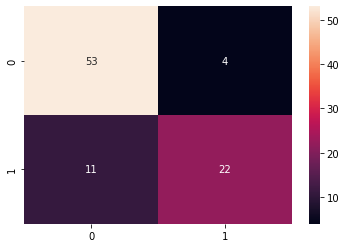

In [17]:
sns.heatmap(cm,annot=True)

In [18]:
acs = accuracy_score(ytest,pred2)
print(acs)

0.8333333333333334


In [19]:
confusion_matrix(ytest,pred2).reshape(-1)

array([53,  4, 11, 22], dtype=int64)

In [21]:
tp,fp,fn,tn = confusion_matrix(ytest,pred2).reshape(-1)
acc = (tp+tn)/(tp+fp+fn+tn)
print(acc)

0.8333333333333334


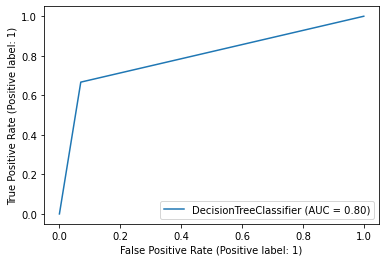

In [22]:
plot_roc_curve(dt,xtest,ytest)

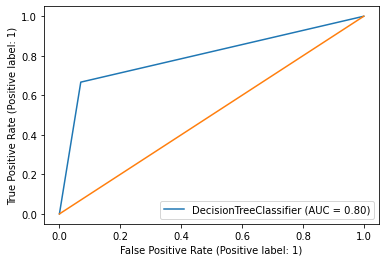

In [24]:
plot_roc_curve(dt,xtest,ytest['DEATH_EVENT'])
plt.plot([0,1],[0,1])

In [25]:
#Precision / Positive Predictive Value (PPV)
ppv = tp/(tp+fp)
print(ppv)

0.9298245614035088


In [26]:
#Sensitivity, Recall, Hit Rate, or True Positive Rate (TPR)
tpr = tp/(tp+fn)
print(tpr)

0.828125


In [27]:
#False Positive Rate (FPR) or 1-Specificity
fpr = fp/(fp+tn)
print(fpr)

0.15384615384615385


In [28]:
#Specificity, Selectivity or True Negative Rate (TNR)
tnr = tn/(tn+fp)
print(tnr)

0.8461538461538461


In [29]:
#Threat Score (TS) or Critical Success Index (CSI)
ts_csi = tp/(tp+fn+fp)
print(ts_csi)

0.7794117647058824


In [30]:
#False Discovery Rate (FDR)
fdr = fp/(tp+fp)
print(fdr)

0.07017543859649122


In [31]:
#Harmonic Mean, F-Measure
hm = (2*ppv*tpr)/(ppv+tpr)   # (2*precision*recall)/(precision+recall)
print(hm)

0.8760330578512396
